Slope calculation using improved GMM

1.06.2022

In [37]:
import numpy as np
import cv2 as cv
import scipy
from scipy import signal
import matplotlib
import matplotlib.pyplot as plt
import os
import shutil
from skimage.morphology import skeletonize
import skimage.io
from sklearn.mixture import GaussianMixture as GMM

from functions import *
from wave_detection.line_detection_gmm import WaveDetector

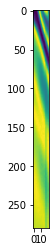

In [83]:
# implement slope measurement for one pixel (I used the following cells to control the situation for different pixels)

frNum = 20
path_to_images = 'sim_2perc/'
kernel = 1
threshold_bin = 0
pixel = [5, 4]
_, corr_full_y = cross_correlation(frNum, path_to_images, pixel, kernel, x_disp=False, y_disp=True)

plt.imshow(corr_full_y)

In [3]:
my_detector = WaveDetector(corr_image=corr_full_y)
my_detector.do_slope_estimation()

18.412630861907843

In [4]:
# calculate elasticity

def elasticity_HT (slopes, dens, conv_pix, conv_fr):
    '''1 cycles = 2e-4 s
    recording rate = 1e5 f/s'''

    conv_factor = (conv_pix / conv_fr) 
    mu = (slopes * conv_factor)**2 * dens
    return mu

In [75]:
os.mkdir('real_2p')
os.mkdir('real_2p_crop')

In [ ]:
# extracting frames from the videos

video_name = '20kHz_400mV_100kfps_384by240_20x_v2_2pcnt_19fr_cut'
path_to_source = 'data/' + video_name + '.avi'
cap = cv.VideoCapture(path_to_source)
num_frames = 10
l=0
while l <= num_frames:
    ret, frame = cap.read()
    if not ret: 
        print('No frames grabbed!')
        break
    cv.imwrite(f'real_2p_v2/{l}.jpg', frame)
    l+=1

In [ ]:
# crop images for faster calculation 

data_path = 'real_2p_v1/'
data_save = 'real_2p_v1_crop/'
x_start = 0
x_end = 90
y_start = 40
y_end = 90
crop_images(data_path, data_save, x_start, x_end, y_start, y_end, color=False)

In [ ]:
# Trying another video

frNum = 10
path_to_images = 'real_2p_v1_crop/'
kernel = 1
threshold_bin = 0
image_1 = cv.imread(path_to_images + '0.jpg', cv.IMREAD_GRAYSCALE)
slopes = np.zeros([image_1.shape[0], image_1.shape[1]])

for i in range(image_1.shape[0]):
    for j in range(image_1.shape[1]):
        pixel=[i, j]
        print(pixel)
        _, corr_full_y = cross_correlation(frNum, path_to_images, pixel, kernel, x_disp=False, y_disp=True)
        my_detector = WaveDetector(corr_image=corr_full_y)
        slope = my_detector.do_slope_estimation()
        slopes[i, j] = slope

In [ ]:
np.median(slopes)

In [ ]:
# plot the result

slopes_norm = cv.normalize(slopes, None, 1, 256, cv.NORM_MINMAX)
plt.imshow(slopes)
plt.title('Slopes for the real wave')
plt.colorbar()
plt.show()

In [ ]:
# slopes = slopes
dens = 1000
conv_pix = 1/2
conv_fr = 1/100000

mu = elasticity_HT(slopes, dens, conv_pix, conv_fr)
np.median(mu)

In [76]:
os.mkdir('sim_2perc')
os.mkdir('sim_2perc_crop')

FileExistsError: [Errno 17] File exists: 'sim_2perc'

In [86]:
# extracting frames from the videos

video_name = 'test2percent_G1100_cut'
path_to_source = 'data/' + video_name + '.avi'
cap = cv.VideoCapture(path_to_source)
num_frames = 30
l=0
while l <= num_frames:
    ret, frame = cap.read()
    if not ret: 
        print('No frames grabbed!')
        break
    cv.imwrite(f'sim_2perc/{l}.jpg', frame)
    l+=1

No frames grabbed!


In [115]:
# crop images for faster calculation 

data_path = 'sim_2perc/'
data_save = 'sim_2perc_crop/'
x_start = 40
x_end = 100
y_start = 40
y_end = 100
crop_images(data_path, data_save, x_start, x_end, y_start, y_end, color=False)

In [116]:
# Trying another video

frNum = 30
path_to_images = 'sim_2perc_crop/'
kernel = 1
threshold_bin = 0
image_1 = cv.imread(path_to_images + '0.jpg', cv.IMREAD_GRAYSCALE)
slopes_2perc = np.zeros([image_1.shape[0], image_1.shape[1]])

for i in range(image_1.shape[0]):
    for j in range(image_1.shape[1]):
        pixel=[i, j]
        print(pixel)
        _, corr_full_y = cross_correlation(frNum, path_to_images, pixel, kernel, x_disp=False, y_disp=True)
        my_detector = WaveDetector(corr_image=corr_full_y)
        slope = my_detector.do_slope_estimation()
        slopes_2perc[i, j] = slope

[0, 0]
[0, 1]
[0, 2]
[0, 3]
[0, 4]
[0, 5]
[0, 6]
[0, 7]
[0, 8]
[0, 9]
[0, 10]
[0, 11]
[0, 12]
[0, 13]
[0, 14]
[0, 15]
[0, 16]
[0, 17]
[0, 18]
[0, 19]
[0, 20]
[0, 21]
[0, 22]
[0, 23]
[0, 24]
[0, 25]
[0, 26]
[0, 27]
[0, 28]
[0, 29]
[0, 30]
[0, 31]
[0, 32]
[0, 33]
[0, 34]
[0, 35]
[0, 36]
[0, 37]
[0, 38]
[0, 39]
[0, 40]
[0, 41]
[0, 42]
[0, 43]
[0, 44]
[0, 45]
[0, 46]
[0, 47]
[0, 48]
[0, 49]
[0, 50]
[0, 51]
[0, 52]
[0, 53]
[0, 54]
[0, 55]
[0, 56]
[0, 57]
[0, 58]
[0, 59]
[1, 0]
[1, 1]
[1, 2]
[1, 3]
[1, 4]
[1, 5]
[1, 6]
[1, 7]
[1, 8]
[1, 9]
[1, 10]
[1, 11]
[1, 12]
[1, 13]
[1, 14]
[1, 15]
[1, 16]
[1, 17]
[1, 18]
[1, 19]
[1, 20]
[1, 21]
[1, 22]
[1, 23]
[1, 24]
[1, 25]
[1, 26]
[1, 27]
[1, 28]
[1, 29]
[1, 30]
[1, 31]
[1, 32]
[1, 33]
[1, 34]
[1, 35]
[1, 36]
[1, 37]
[1, 38]
[1, 39]
[1, 40]
[1, 41]
[1, 42]
[1, 43]
[1, 44]
[1, 45]
[1, 46]
[1, 47]
[1, 48]
[1, 49]
[1, 50]
[1, 51]
[1, 52]
[1, 53]
[1, 54]
[1, 55]
[1, 56]
[1, 57]
[1, 58]
[1, 59]
[2, 0]
[2, 1]
[2, 2]
[2, 3]
[2, 4]
[2, 5]
[2, 6]
[2, 7]
[2, 

[16, 40]
[16, 41]
[16, 42]
[16, 43]
[16, 44]
[16, 45]
[16, 46]
[16, 47]
[16, 48]
[16, 49]
[16, 50]
[16, 51]
[16, 52]
[16, 53]
[16, 54]
[16, 55]
[16, 56]
[16, 57]
[16, 58]
[16, 59]
[17, 0]
[17, 1]
[17, 2]
[17, 3]
[17, 4]
[17, 5]
[17, 6]
[17, 7]
[17, 8]
[17, 9]
[17, 10]
[17, 11]
[17, 12]
[17, 13]
[17, 14]
[17, 15]
[17, 16]
[17, 17]
[17, 18]
[17, 19]
[17, 20]
[17, 21]
[17, 22]
[17, 23]
[17, 24]
[17, 25]
[17, 26]
[17, 27]
[17, 28]
[17, 29]
[17, 30]
[17, 31]
[17, 32]
[17, 33]
[17, 34]
[17, 35]
[17, 36]
[17, 37]
[17, 38]
[17, 39]
[17, 40]
[17, 41]
[17, 42]
[17, 43]
[17, 44]
[17, 45]
[17, 46]
[17, 47]
[17, 48]
[17, 49]
[17, 50]
[17, 51]
[17, 52]
[17, 53]
[17, 54]
[17, 55]
[17, 56]
[17, 57]
[17, 58]
[17, 59]
[18, 0]
[18, 1]
[18, 2]
[18, 3]
[18, 4]
[18, 5]
[18, 6]
[18, 7]
[18, 8]
[18, 9]
[18, 10]
[18, 11]
[18, 12]
[18, 13]
[18, 14]
[18, 15]
[18, 16]
[18, 17]
[18, 18]
[18, 19]
[18, 20]
[18, 21]
[18, 22]
[18, 23]
[18, 24]
[18, 25]
[18, 26]
[18, 27]
[18, 28]
[18, 29]
[18, 30]
[18, 31]
[18, 32]
[18

[32, 17]
[32, 18]
[32, 19]
[32, 20]
[32, 21]
[32, 22]
[32, 23]
[32, 24]
[32, 25]
[32, 26]
[32, 27]
[32, 28]
[32, 29]
[32, 30]
[32, 31]
[32, 32]
[32, 33]
[32, 34]
[32, 35]
[32, 36]
[32, 37]
[32, 38]
[32, 39]
[32, 40]
[32, 41]
[32, 42]
[32, 43]
[32, 44]
[32, 45]
[32, 46]
[32, 47]
[32, 48]
[32, 49]
[32, 50]
[32, 51]
[32, 52]
[32, 53]
[32, 54]
[32, 55]
[32, 56]
[32, 57]
[32, 58]
[32, 59]
[33, 0]
[33, 1]
[33, 2]
[33, 3]
[33, 4]
[33, 5]
[33, 6]
[33, 7]
[33, 8]
[33, 9]
[33, 10]
[33, 11]
[33, 12]
[33, 13]
[33, 14]
[33, 15]
[33, 16]
[33, 17]
[33, 18]
[33, 19]
[33, 20]
[33, 21]
[33, 22]
[33, 23]
[33, 24]
[33, 25]
[33, 26]
[33, 27]
[33, 28]
[33, 29]
[33, 30]
[33, 31]
[33, 32]
[33, 33]
[33, 34]
[33, 35]
[33, 36]
[33, 37]
[33, 38]
[33, 39]
[33, 40]
[33, 41]
[33, 42]
[33, 43]
[33, 44]
[33, 45]
[33, 46]
[33, 47]
[33, 48]
[33, 49]
[33, 50]
[33, 51]
[33, 52]
[33, 53]
[33, 54]
[33, 55]
[33, 56]
[33, 57]
[33, 58]
[33, 59]
[34, 0]
[34, 1]
[34, 2]
[34, 3]
[34, 4]
[34, 5]
[34, 6]
[34, 7]
[34, 8]
[34, 9]
[34

[47, 50]
[47, 51]
[47, 52]
[47, 53]
[47, 54]
[47, 55]
[47, 56]
[47, 57]
[47, 58]
[47, 59]
[48, 0]
[48, 1]
[48, 2]
[48, 3]
[48, 4]
[48, 5]
[48, 6]
[48, 7]
[48, 8]
[48, 9]
[48, 10]
[48, 11]
[48, 12]
[48, 13]
[48, 14]
[48, 15]
[48, 16]
[48, 17]
[48, 18]
[48, 19]
[48, 20]
[48, 21]
[48, 22]
[48, 23]
[48, 24]
[48, 25]
[48, 26]
[48, 27]
[48, 28]
[48, 29]
[48, 30]
[48, 31]
[48, 32]
[48, 33]
[48, 34]
[48, 35]
[48, 36]
[48, 37]
[48, 38]
[48, 39]
[48, 40]
[48, 41]
[48, 42]
[48, 43]
[48, 44]
[48, 45]
[48, 46]
[48, 47]
[48, 48]
[48, 49]
[48, 50]
[48, 51]
[48, 52]
[48, 53]
[48, 54]
[48, 55]
[48, 56]
[48, 57]
[48, 58]
[48, 59]
[49, 0]
[49, 1]
[49, 2]
[49, 3]
[49, 4]
[49, 5]
[49, 6]
[49, 7]
[49, 8]
[49, 9]
[49, 10]
[49, 11]
[49, 12]
[49, 13]
[49, 14]
[49, 15]
[49, 16]
[49, 17]
[49, 18]
[49, 19]
[49, 20]
[49, 21]
[49, 22]
[49, 23]
[49, 24]
[49, 25]
[49, 26]
[49, 27]
[49, 28]
[49, 29]
[49, 30]
[49, 31]
[49, 32]
[49, 33]
[49, 34]
[49, 35]
[49, 36]
[49, 37]
[49, 38]
[49, 39]
[49, 40]
[49, 41]
[49, 42]
[49

In [117]:
np.mean(slopes_2perc)

3.579255558318851

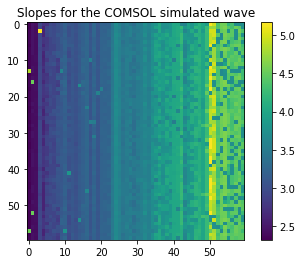

In [118]:
# plot the result

slopes_norm = cv.normalize(slopes_2perc, None, 1, 256, cv.NORM_MINMAX)
plt.imshow(slopes_2perc)
plt.title('Slopes for the COMSOL simulated wave')
plt.colorbar()
plt.show()

In [119]:
# slopes = slopes
dens = 997
conv_pix = 0.779 * 10**(-6)
conv_fr = (1/(12500*85))*(85/30)

mu = elasticity_HT(slopes_2perc, dens, conv_pix, conv_fr)
np.median(mu)

1078.1320908129703

In [120]:
# compute the angles

angs = 180 - np.arctan(slopes_2perc)*180/np.pi
angs

array([[113.27995266, 112.06391294, 112.34937155, ..., 104.99979322,
        105.13211615, 104.91140471],
       [113.27995266, 112.06391294, 112.45247618, ..., 102.45825548,
        102.65809996, 104.88322844],
       [112.97777411, 112.06391294, 112.45247618, ..., 104.99979322,
        102.33209206, 102.8838503 ],
       ...,
       [102.42941884, 112.43374386, 112.45247618, ..., 102.45825548,
        102.65809996, 103.16593257],
       [113.27995266, 112.06391294, 112.34937155, ..., 102.54341516,
        102.65809996, 102.65956727],
       [112.97777411, 112.06391294, 112.45247618, ..., 102.82385973,
        102.65809996, 102.65956727]])

In [95]:
os.mkdir('sim_1perc')
os.mkdir('sim_1perc_crop')

FileExistsError: [Errno 17] File exists: 'sim_1perc'

In [121]:
# extracting frames from the videos

video_name = 'test1percent_G600_cut'
path_to_source = 'data/' + video_name + '.avi'
cap = cv.VideoCapture(path_to_source)
num_frames = 30
l=0
while l <= num_frames:
    ret, frame = cap.read()
    if not ret: 
        print('No frames grabbed!')
        break
    cv.imwrite(f'sim_1perc/{l}.jpg', frame)
    l+=1

No frames grabbed!


In [97]:
im=cv.imread('sim_1perc/0.jpg')
im.shape

(280, 188, 3)

In [122]:
# crop images for faster calculation 

data_path = 'sim_1perc/'
data_save = 'sim_1perc_crop/'
x_start = 40
x_end =100
y_start = 40
y_end = 100
crop_images(data_path, data_save, x_start, x_end, y_start, y_end, color=False)

In [123]:
# Trying another video

frNum = 30
path_to_images = 'sim_1perc_crop/'
kernel = 1
threshold_bin = 0
image_1 = cv.imread(path_to_images + '0.jpg', cv.IMREAD_GRAYSCALE)
slopes_1perc = np.zeros([image_1.shape[0], image_1.shape[1]])

for i in range(image_1.shape[0]):
    for j in range(image_1.shape[1]):
        pixel=[i, j]
        print(pixel)
        _, corr_full_y = cross_correlation(frNum, path_to_images, pixel, kernel, x_disp=False, y_disp=True)
        my_detector = WaveDetector(corr_image=corr_full_y)
        slope = my_detector.do_slope_estimation()
        slopes_1perc[i, j] = slope

[0, 0]
[0, 1]
[0, 2]
[0, 3]
[0, 4]
[0, 5]
[0, 6]
[0, 7]
[0, 8]
[0, 9]
[0, 10]
[0, 11]
[0, 12]
[0, 13]
[0, 14]
[0, 15]
[0, 16]
[0, 17]
[0, 18]
[0, 19]
[0, 20]
[0, 21]
[0, 22]
[0, 23]
[0, 24]
[0, 25]
[0, 26]
[0, 27]
[0, 28]
[0, 29]
[0, 30]
[0, 31]
[0, 32]
[0, 33]
[0, 34]
[0, 35]
[0, 36]
[0, 37]
[0, 38]
[0, 39]
[0, 40]
[0, 41]
[0, 42]
[0, 43]
[0, 44]
[0, 45]
[0, 46]
[0, 47]
[0, 48]
[0, 49]
[0, 50]
[0, 51]
[0, 52]
[0, 53]
[0, 54]
[0, 55]
[0, 56]
[0, 57]
[0, 58]
[0, 59]
[1, 0]
[1, 1]
[1, 2]
[1, 3]
[1, 4]
[1, 5]
[1, 6]
[1, 7]
[1, 8]
[1, 9]
[1, 10]
[1, 11]
[1, 12]
[1, 13]
[1, 14]
[1, 15]
[1, 16]
[1, 17]
[1, 18]
[1, 19]
[1, 20]
[1, 21]
[1, 22]
[1, 23]
[1, 24]
[1, 25]
[1, 26]
[1, 27]
[1, 28]
[1, 29]
[1, 30]
[1, 31]
[1, 32]
[1, 33]
[1, 34]
[1, 35]
[1, 36]
[1, 37]
[1, 38]
[1, 39]
[1, 40]
[1, 41]
[1, 42]
[1, 43]
[1, 44]
[1, 45]
[1, 46]
[1, 47]
[1, 48]
[1, 49]
[1, 50]
[1, 51]
[1, 52]
[1, 53]
[1, 54]
[1, 55]
[1, 56]
[1, 57]
[1, 58]
[1, 59]
[2, 0]
[2, 1]
[2, 2]
[2, 3]
[2, 4]
[2, 5]
[2, 6]
[2, 7]
[2, 

[16, 46]
[16, 47]
[16, 48]
[16, 49]
[16, 50]
[16, 51]
[16, 52]
[16, 53]
[16, 54]
[16, 55]
[16, 56]
[16, 57]
[16, 58]
[16, 59]
[17, 0]
[17, 1]
[17, 2]
[17, 3]
[17, 4]
[17, 5]
[17, 6]
[17, 7]
[17, 8]
[17, 9]
[17, 10]
[17, 11]
[17, 12]
[17, 13]
[17, 14]
[17, 15]
[17, 16]
[17, 17]
[17, 18]
[17, 19]
[17, 20]
[17, 21]
[17, 22]
[17, 23]
[17, 24]
[17, 25]
[17, 26]
[17, 27]
[17, 28]
[17, 29]
[17, 30]
[17, 31]
[17, 32]
[17, 33]
[17, 34]
[17, 35]
[17, 36]
[17, 37]
[17, 38]
[17, 39]
[17, 40]
[17, 41]
[17, 42]
[17, 43]
[17, 44]
[17, 45]
[17, 46]
[17, 47]
[17, 48]
[17, 49]
[17, 50]
[17, 51]
[17, 52]
[17, 53]
[17, 54]
[17, 55]
[17, 56]
[17, 57]
[17, 58]
[17, 59]
[18, 0]
[18, 1]
[18, 2]
[18, 3]
[18, 4]
[18, 5]
[18, 6]
[18, 7]
[18, 8]
[18, 9]
[18, 10]
[18, 11]
[18, 12]
[18, 13]
[18, 14]
[18, 15]
[18, 16]
[18, 17]
[18, 18]
[18, 19]
[18, 20]
[18, 21]
[18, 22]
[18, 23]
[18, 24]
[18, 25]
[18, 26]
[18, 27]
[18, 28]
[18, 29]
[18, 30]
[18, 31]
[18, 32]
[18, 33]
[18, 34]
[18, 35]
[18, 36]
[18, 37]
[18, 38]
[18

[32, 28]
[32, 29]
[32, 30]
[32, 31]
[32, 32]
[32, 33]
[32, 34]
[32, 35]
[32, 36]
[32, 37]
[32, 38]
[32, 39]
[32, 40]
[32, 41]
[32, 42]
[32, 43]
[32, 44]
[32, 45]
[32, 46]
[32, 47]
[32, 48]
[32, 49]
[32, 50]
[32, 51]
[32, 52]
[32, 53]
[32, 54]
[32, 55]
[32, 56]
[32, 57]
[32, 58]
[32, 59]
[33, 0]
[33, 1]
[33, 2]
[33, 3]
[33, 4]
[33, 5]
[33, 6]
[33, 7]
[33, 8]
[33, 9]
[33, 10]
[33, 11]
[33, 12]
[33, 13]
[33, 14]
[33, 15]
[33, 16]
[33, 17]
[33, 18]
[33, 19]
[33, 20]
[33, 21]
[33, 22]
[33, 23]
[33, 24]
[33, 25]
[33, 26]
[33, 27]
[33, 28]
[33, 29]
[33, 30]
[33, 31]
[33, 32]
[33, 33]
[33, 34]
[33, 35]
[33, 36]
[33, 37]
[33, 38]
[33, 39]
[33, 40]
[33, 41]
[33, 42]
[33, 43]
[33, 44]
[33, 45]
[33, 46]
[33, 47]
[33, 48]
[33, 49]
[33, 50]
[33, 51]
[33, 52]
[33, 53]
[33, 54]
[33, 55]
[33, 56]
[33, 57]
[33, 58]
[33, 59]
[34, 0]
[34, 1]
[34, 2]
[34, 3]
[34, 4]
[34, 5]
[34, 6]
[34, 7]
[34, 8]
[34, 9]
[34, 10]
[34, 11]
[34, 12]
[34, 13]
[34, 14]
[34, 15]
[34, 16]
[34, 17]
[34, 18]
[34, 19]
[34, 20]
[34

[48, 2]
[48, 3]
[48, 4]
[48, 5]
[48, 6]
[48, 7]
[48, 8]
[48, 9]
[48, 10]
[48, 11]
[48, 12]
[48, 13]
[48, 14]
[48, 15]
[48, 16]
[48, 17]
[48, 18]
[48, 19]
[48, 20]
[48, 21]
[48, 22]
[48, 23]
[48, 24]
[48, 25]
[48, 26]
[48, 27]
[48, 28]
[48, 29]
[48, 30]
[48, 31]
[48, 32]
[48, 33]
[48, 34]
[48, 35]
[48, 36]
[48, 37]
[48, 38]
[48, 39]
[48, 40]
[48, 41]
[48, 42]
[48, 43]
[48, 44]
[48, 45]
[48, 46]
[48, 47]
[48, 48]
[48, 49]
[48, 50]
[48, 51]
[48, 52]
[48, 53]
[48, 54]
[48, 55]
[48, 56]
[48, 57]
[48, 58]
[48, 59]
[49, 0]
[49, 1]
[49, 2]
[49, 3]
[49, 4]
[49, 5]
[49, 6]
[49, 7]
[49, 8]
[49, 9]
[49, 10]
[49, 11]
[49, 12]
[49, 13]
[49, 14]
[49, 15]
[49, 16]
[49, 17]
[49, 18]
[49, 19]
[49, 20]
[49, 21]
[49, 22]
[49, 23]
[49, 24]
[49, 25]
[49, 26]
[49, 27]
[49, 28]
[49, 29]
[49, 30]
[49, 31]
[49, 32]
[49, 33]
[49, 34]
[49, 35]
[49, 36]
[49, 37]
[49, 38]
[49, 39]
[49, 40]
[49, 41]
[49, 42]
[49, 43]
[49, 44]
[49, 45]
[49, 46]
[49, 47]
[49, 48]
[49, 49]
[49, 50]
[49, 51]
[49, 52]
[49, 53]
[49, 54]
[

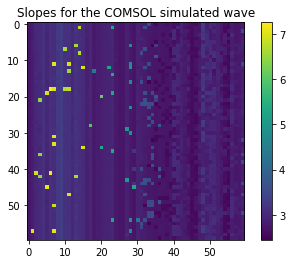

In [125]:
# plot the result

slopes_norm = cv.normalize(slopes_1perc, None, 1, 256, cv.NORM_MINMAX)
plt.imshow(slopes_1perc)
plt.title('Slopes for the COMSOL simulated wave')
plt.colorbar()
plt.show()

In [126]:
np.median(slopes_1perc)

2.8594232131221338

In [127]:
# slopes = slopes
dens = 997
conv_pix = 0.779 * 10**(-6)
conv_fr = (1/(12500*85))*(85/30)

mu_1perc = elasticity_HT(slopes_1perc, dens, conv_pix, conv_fr)
np.median(mu_1perc)

695.6479123202248

In [128]:
# compute the angles

angs_1perc = 180 - np.arctan(slopes_1perc)*180/np.pi
angs_1perc

array([[110.07082936, 109.48663366, 108.56452402, ..., 109.98616857,
        109.91613026, 109.47963298],
       [110.07082936, 109.48663366, 108.45766496, ..., 109.98616857,
        109.91613026, 109.47963298],
       [110.07082936, 109.42840293, 108.52996065, ..., 110.08299476,
        109.78346303, 105.77748675],
       ...,
       [109.99900676,  98.09054646, 108.65663436, ..., 110.08600352,
        109.18949402, 108.82594738],
       [109.99900676, 109.4510621 , 108.48901216, ..., 109.45052805,
        109.2488939 , 109.47963298],
       [110.17053007, 109.4510621 , 108.65663436, ..., 109.30960799,
        109.78346303, 109.16936094]])

In [ ]:
os.mkdir('sim_05perc')
os.mkdir('sim_05perc_crop')

In [144]:
# extracting frames from the videos

video_name = 'test05percent_G200_cut'
path_to_source = 'data/' + video_name + '.avi'
cap = cv.VideoCapture(path_to_source)
num_frames = 30
l=0
while l <= num_frames:
    ret, frame = cap.read()
    if not ret: 
        print('No frames grabbed!')
        break
    cv.imwrite(f'sim_05perc/{l}.jpg', frame)
    l+=1

No frames grabbed!


In [150]:
# crop images for faster calculation 

data_path = 'sim_05perc/'
data_save = 'sim_05perc_crop/'
x_start = 60
x_end = 120
y_start = 60
y_end = 120
crop_images(data_path, data_save, x_start, x_end, y_start, y_end, color=False)

In [151]:
# Trying another video 

frNum = 30
path_to_images = 'sim_05perc_crop/'
kernel = 1
threshold_bin = 0
image_1 = cv.imread(path_to_images + '0.jpg', cv.IMREAD_GRAYSCALE)
slopes_05perc = np.zeros([image_1.shape[0], image_1.shape[1]])

for i in range(image_1.shape[0]):
    for j in range(image_1.shape[1]):
        pixel=[i, j]
        print(pixel)
        _, corr_full_y = cross_correlation(frNum, path_to_images, pixel, kernel, x_disp=False, y_disp=True)
        my_detector = WaveDetector(corr_image=corr_full_y)
        slope = my_detector.do_slope_estimation()
        slopes_05perc[i, j] = slope

[0, 0]
[0, 1]
[0, 2]
[0, 3]
[0, 4]
[0, 5]
[0, 6]
[0, 7]
[0, 8]
[0, 9]
[0, 10]
[0, 11]
[0, 12]
[0, 13]
[0, 14]
[0, 15]
[0, 16]
[0, 17]
[0, 18]
[0, 19]
[0, 20]
[0, 21]
[0, 22]
[0, 23]
[0, 24]
[0, 25]
[0, 26]
[0, 27]
[0, 28]
[0, 29]
[0, 30]
[0, 31]
[0, 32]
[0, 33]
[0, 34]
[0, 35]
[0, 36]
[0, 37]
[0, 38]
[0, 39]
[0, 40]
[0, 41]
[0, 42]
[0, 43]
[0, 44]
[0, 45]
[0, 46]
[0, 47]
[0, 48]
[0, 49]
[0, 50]
[0, 51]
[0, 52]
[0, 53]
[0, 54]
[0, 55]
[0, 56]
[0, 57]
[0, 58]
[0, 59]
[1, 0]
[1, 1]
[1, 2]
[1, 3]
[1, 4]
[1, 5]
[1, 6]
[1, 7]
[1, 8]
[1, 9]
[1, 10]
[1, 11]
[1, 12]
[1, 13]
[1, 14]
[1, 15]
[1, 16]
[1, 17]
[1, 18]
[1, 19]
[1, 20]
[1, 21]
[1, 22]
[1, 23]
[1, 24]
[1, 25]
[1, 26]
[1, 27]
[1, 28]
[1, 29]
[1, 30]
[1, 31]
[1, 32]
[1, 33]
[1, 34]
[1, 35]
[1, 36]
[1, 37]
[1, 38]
[1, 39]
[1, 40]
[1, 41]
[1, 42]
[1, 43]
[1, 44]
[1, 45]
[1, 46]
[1, 47]
[1, 48]
[1, 49]
[1, 50]
[1, 51]
[1, 52]
[1, 53]
[1, 54]
[1, 55]
[1, 56]
[1, 57]
[1, 58]
[1, 59]
[2, 0]
[2, 1]
[2, 2]
[2, 3]
[2, 4]
[2, 5]
[2, 6]
[2, 7]
[2, 

[16, 43]
[16, 44]
[16, 45]
[16, 46]
[16, 47]
[16, 48]
[16, 49]
[16, 50]
[16, 51]
[16, 52]
[16, 53]
[16, 54]
[16, 55]
[16, 56]
[16, 57]
[16, 58]
[16, 59]
[17, 0]
[17, 1]
[17, 2]
[17, 3]
[17, 4]
[17, 5]
[17, 6]
[17, 7]
[17, 8]
[17, 9]
[17, 10]
[17, 11]
[17, 12]
[17, 13]
[17, 14]
[17, 15]
[17, 16]
[17, 17]
[17, 18]
[17, 19]
[17, 20]
[17, 21]
[17, 22]
[17, 23]
[17, 24]
[17, 25]
[17, 26]
[17, 27]
[17, 28]
[17, 29]
[17, 30]
[17, 31]
[17, 32]
[17, 33]
[17, 34]
[17, 35]
[17, 36]
[17, 37]
[17, 38]
[17, 39]
[17, 40]
[17, 41]
[17, 42]
[17, 43]
[17, 44]
[17, 45]
[17, 46]
[17, 47]
[17, 48]
[17, 49]
[17, 50]
[17, 51]
[17, 52]
[17, 53]
[17, 54]
[17, 55]
[17, 56]
[17, 57]
[17, 58]
[17, 59]
[18, 0]
[18, 1]
[18, 2]
[18, 3]
[18, 4]
[18, 5]
[18, 6]
[18, 7]
[18, 8]
[18, 9]
[18, 10]
[18, 11]
[18, 12]
[18, 13]
[18, 14]
[18, 15]
[18, 16]
[18, 17]
[18, 18]
[18, 19]
[18, 20]
[18, 21]
[18, 22]
[18, 23]
[18, 24]
[18, 25]
[18, 26]
[18, 27]
[18, 28]
[18, 29]
[18, 30]
[18, 31]
[18, 32]
[18, 33]
[18, 34]
[18, 35]
[18

[32, 13]
[32, 14]
[32, 15]
[32, 16]
[32, 17]
[32, 18]
[32, 19]
[32, 20]
[32, 21]
[32, 22]
[32, 23]
[32, 24]
[32, 25]
[32, 26]
[32, 27]
[32, 28]
[32, 29]
[32, 30]
[32, 31]
[32, 32]
[32, 33]
[32, 34]
[32, 35]
[32, 36]
[32, 37]
[32, 38]
[32, 39]
[32, 40]
[32, 41]
[32, 42]
[32, 43]
[32, 44]
[32, 45]
[32, 46]
[32, 47]
[32, 48]
[32, 49]
[32, 50]
[32, 51]
[32, 52]
[32, 53]
[32, 54]
[32, 55]
[32, 56]
[32, 57]
[32, 58]
[32, 59]
[33, 0]
[33, 1]
[33, 2]
[33, 3]
[33, 4]
[33, 5]
[33, 6]
[33, 7]
[33, 8]
[33, 9]
[33, 10]
[33, 11]
[33, 12]
[33, 13]
[33, 14]
[33, 15]
[33, 16]
[33, 17]
[33, 18]
[33, 19]
[33, 20]
[33, 21]
[33, 22]
[33, 23]
[33, 24]
[33, 25]
[33, 26]
[33, 27]
[33, 28]
[33, 29]
[33, 30]
[33, 31]
[33, 32]
[33, 33]
[33, 34]
[33, 35]
[33, 36]
[33, 37]
[33, 38]
[33, 39]
[33, 40]
[33, 41]
[33, 42]
[33, 43]
[33, 44]
[33, 45]
[33, 46]
[33, 47]
[33, 48]
[33, 49]
[33, 50]
[33, 51]
[33, 52]
[33, 53]
[33, 54]
[33, 55]
[33, 56]
[33, 57]
[33, 58]
[33, 59]
[34, 0]
[34, 1]
[34, 2]
[34, 3]
[34, 4]
[34, 5]

[47, 43]
[47, 44]
[47, 45]
[47, 46]
[47, 47]
[47, 48]
[47, 49]
[47, 50]
[47, 51]
[47, 52]
[47, 53]
[47, 54]
[47, 55]
[47, 56]
[47, 57]
[47, 58]
[47, 59]
[48, 0]
[48, 1]
[48, 2]
[48, 3]
[48, 4]
[48, 5]
[48, 6]
[48, 7]
[48, 8]
[48, 9]
[48, 10]
[48, 11]
[48, 12]
[48, 13]
[48, 14]
[48, 15]
[48, 16]
[48, 17]
[48, 18]
[48, 19]
[48, 20]
[48, 21]
[48, 22]
[48, 23]
[48, 24]
[48, 25]
[48, 26]
[48, 27]
[48, 28]
[48, 29]
[48, 30]
[48, 31]
[48, 32]
[48, 33]
[48, 34]
[48, 35]
[48, 36]
[48, 37]
[48, 38]
[48, 39]
[48, 40]
[48, 41]
[48, 42]
[48, 43]
[48, 44]
[48, 45]
[48, 46]
[48, 47]
[48, 48]
[48, 49]
[48, 50]
[48, 51]
[48, 52]
[48, 53]
[48, 54]
[48, 55]
[48, 56]
[48, 57]
[48, 58]
[48, 59]
[49, 0]
[49, 1]
[49, 2]
[49, 3]
[49, 4]
[49, 5]
[49, 6]
[49, 7]
[49, 8]
[49, 9]
[49, 10]
[49, 11]
[49, 12]
[49, 13]
[49, 14]
[49, 15]
[49, 16]
[49, 17]
[49, 18]
[49, 19]
[49, 20]
[49, 21]
[49, 22]
[49, 23]
[49, 24]
[49, 25]
[49, 26]
[49, 27]
[49, 28]
[49, 29]
[49, 30]
[49, 31]
[49, 32]
[49, 33]
[49, 34]
[49, 35]
[49

In [147]:
median_slope = np.median(slopes_05perc)
median_slope 

2.098329839830524

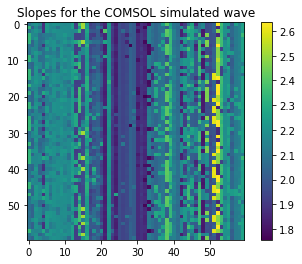

In [148]:
# plot the result

slopes_norm = cv.normalize(slopes_05perc, None, 1, 256, cv.NORM_MINMAX)
plt.imshow(slopes_05perc)
plt.title('Slopes for the COMSOL simulated wave')
plt.colorbar()
plt.show()

In [65]:
np.unravel_index(np.argmin(slopes_05perc, axis=None), slopes_05perc.shape)

(0, 27)

In [149]:
# slopes = slopes
dens = 997
conv_pix = 0.779 * 10**(-6)
conv_fr = (1/(12500*85))*(85/30)

mu_05perc = elasticity_HT(slopes_05perc, dens, conv_pix, conv_fr)
np.median(mu_05perc)

374.6106845893587

In [67]:
# compute the angles

angs_05perc = 180 - np.arctan(slopes_05perc)*180/np.pi
angs_05perc

array([[119.6774187 , 113.02420305, 125.64628856, ..., 115.25795582,
        104.79994238, 105.14107469],
       [119.6774187 , 120.32848714, 121.38259391, ..., 112.35014957,
        112.02960061, 105.40440633],
       [ 94.9452812 , 120.29449195,  95.07702168, ..., 114.65815503,
        111.58715812, 105.10774686],
       ...,
       [ 97.88006804, 120.27895758, 120.67157578, ..., 112.35014957,
        110.48685633, 105.14107469],
       [ 95.21929346, 120.29449195, 125.64628856, ..., 114.05907458,
        104.78943548, 109.51324907],
       [115.41869587, 113.67037818,  94.80414147, ..., 114.65815503,
        111.58715812, 109.51324907]])